# Fundamentals of Data Analysis, 2019 Project

![Numpy Pic](waitress.png)

Back in the years when I was studying I used to work as a waitress to make some money to let me study during the summer months. 
I remember half of my salary while working in Dublin were tips. 
Many different aspects impacted this, but I think most relevant ones were:
* location
* rank of restaurant
* nationality of the customer
* time of my shift

In this project data set that was given is a randomly prepared tips amounts from unknown restaurant but at least knowing shift times.
Dimensions that are presented are:
* Total bill amount
* Tip amount
* Sex
* Smoker
* Day
* Time
* Size - number of peopole at the table

Using python I will try to explain here depending on conditions above how much it could be expected in tips.


----------------------------
# Data Presentation - 
Show first 5 rows of dataset in order to imagine how imported file looks like

In [67]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In this project modules used are:

* Numpy - Importing picture into the repository
import numpy as np

* Pandas - Structurize data into columns and rows
import pandas as pd

* Matplotlip -  Build plots
import matplotlib.pyplot as plt

* Seaborn - sophisticated statistical plot visualisations
import seaborn as sns

----------------------
Countplot can be used to prove who pays the bill more often depending on whether he/she smokes or not

Panda DataFrame informs: 
* about numbers - how many smoking male paid the bill, non smoking women, etc.
* who grabbed the bill more often depending on how many people were sitting at the table
* is also able to present above in column graphical way

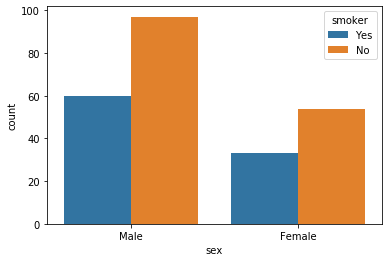

In [73]:
ax = sns.countplot(x="sex", hue = 'smoker', data=tips)

In [95]:
df = pd.DataFrame(dict(tips))
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: smoker, dtype: int64

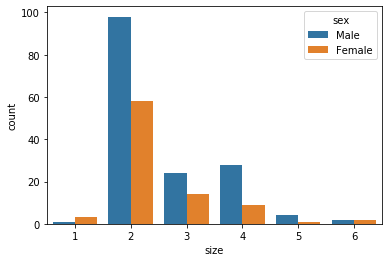

In [75]:
ax = sns.countplot(x="size", hue = 'sex', data=tips)

In [76]:
df = pd.DataFrame(dict(tips))
df.groupby('size')['sex'].value_counts()

size  sex   
1     Female     3
      Male       1
2     Male      98
      Female    58
3     Male      24
      Female    14
4     Male      28
      Female     9
5     Male       4
      Female     1
6     Female     2
      Male       2
Name: sex, dtype: int64

In [77]:
df.groupby('sex').tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

-------------------
## Analysis of the relationship between total bill and tip

I was thought that the standard is to leave 10% tip in a restaurant. 
In my opinion it is better to present tip amount as % of total_bill because it demonstrate not only tip amount but also how generous people are(or not). 
I will add a column into dataset called percentage which will be tip/total_bill amount and present upgreaded table below.


In [78]:
tips['Percentage'] =  (tips['tip'] / tips['total_bill'] ) * 100
tips.sort_values
print(tips)

     total_bill   tip     sex smoker   day    time  size  Percentage
0         16.99  1.01  Female     No   Sun  Dinner     2    5.944673
1         10.34  1.66    Male     No   Sun  Dinner     3   16.054159
2         21.01  3.50    Male     No   Sun  Dinner     3   16.658734
3         23.68  3.31    Male     No   Sun  Dinner     2   13.978041
4         24.59  3.61  Female     No   Sun  Dinner     4   14.680765
..          ...   ...     ...    ...   ...     ...   ...         ...
239       29.03  5.92    Male     No   Sat  Dinner     3   20.392697
240       27.18  2.00  Female    Yes   Sat  Dinner     2    7.358352
241       22.67  2.00    Male    Yes   Sat  Dinner     2    8.822232
242       17.82  1.75    Male     No   Sat  Dinner     2    9.820426
243       18.78  3.00  Female     No  Thur  Dinner     2   15.974441

[244 rows x 8 columns]


Distplot from seaborn database allows to view density plot to see distribution of total_bill amount.

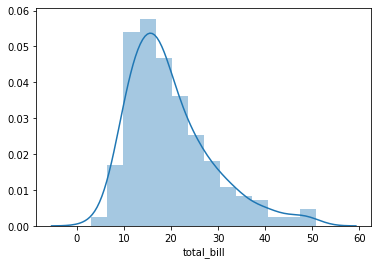

In [79]:
sns.distplot(tips.total_bill)

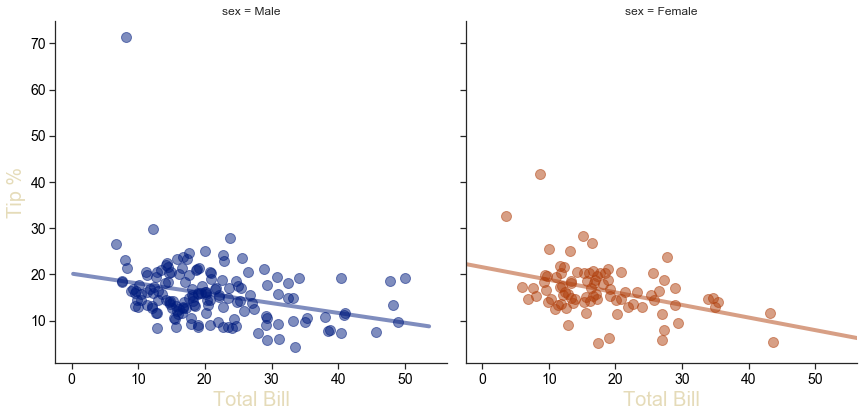

In [138]:
import matplotlib.pyplot as plt
a = sns.lmplot(x="total_bill", y="Percentage",ci=None,data=tips, col="sex",
palette="dark",col_wrap=2,scatter_kws={"s": 100,"alpha":.5},
line_kws={"lw":4,"alpha":0.5},hue="sex",x_jitter=1.0,y_jitter=1.0,size=6)

# remove the top and right line in graph
sns.despine()
# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the xlabel of the graph from here
a.set_xlabels("Total Bill",size = 20,color="y",alpha=0.5)

# Set the ylabel of the graph from here
a.set_ylabels("Tip %",size = 20,color="y",alpha=0.5)

# Set the ticklabel size and color of the graph from here
titles = ['Male','Female']
for ax,title in zip(a.axes.flat,titles):
    ax.tick_params(labelsize=14,labelcolor="black")


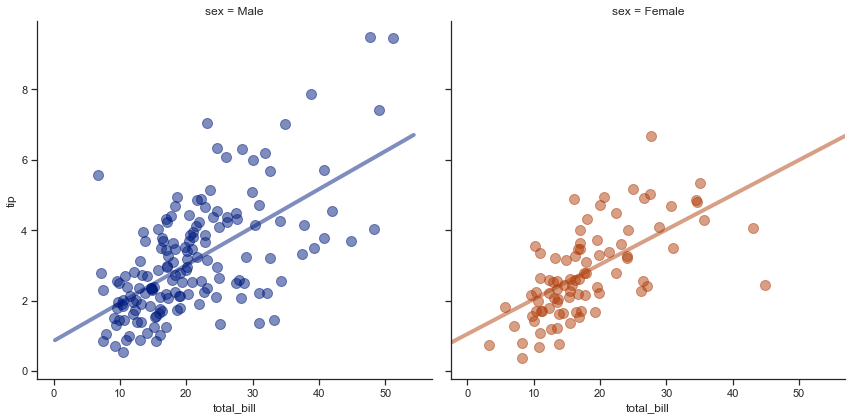

In [148]:
a = sns.lmplot(x="total_bill", y="tip",ci=None,data=tips, col="sex",
palette="dark",col_wrap=2,scatter_kws={"s": 100,"alpha":.5},
line_kws={"lw":4,"alpha":0.5},hue="sex",x_jitter=1.0,y_jitter=1.0,size=6)

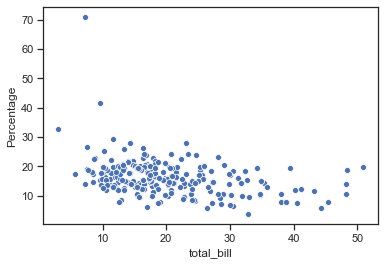

In [139]:
sns.scatterplot(x='total_bill', y='Percentage', data = tips)

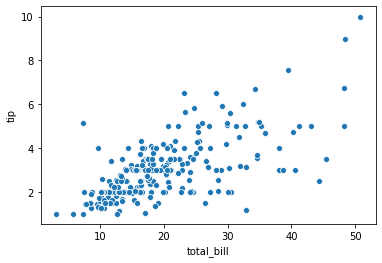

In [82]:
sns.scatterplot(x='total_bill', y='tip', data = tips)

Seaborn jointplot is great to use to visualise the data. 
Darkest the spots - highest density of percentage and total_bill.
On top and on the side we can see the volume of presented data.

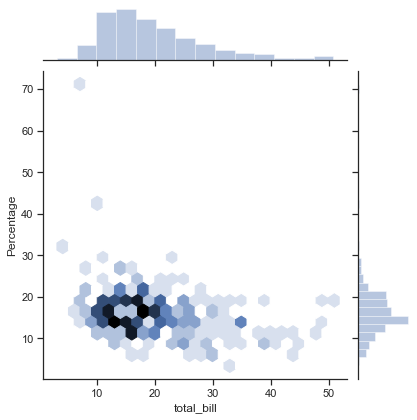

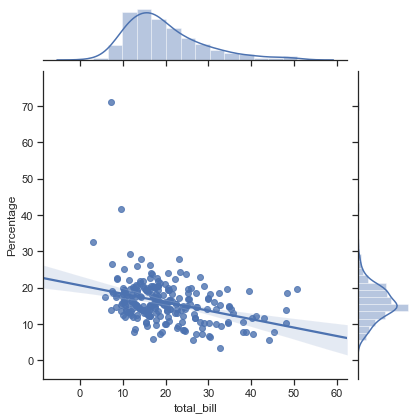

In [137]:
sns.jointplot(x='total_bill', y='Percentage', data = tips, kind='hex')
sns.jointplot(x='total_bill', y='Percentage', data = tips, kind='reg')

Assumption from the above:
   * People are more eager to tip higher when the bill is smaller
   * once bill is more then 10 maximum tip will be 30% of the bill amount


## Relationship between other variances

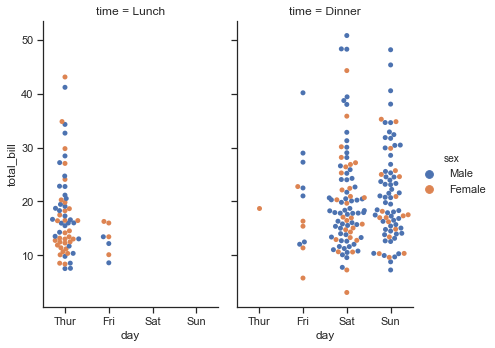

In [142]:
sns.catplot(x="day", y="total_bill", hue="sex",
            col="time", aspect=.6,
            kind="swarm", data=tips);

* Lowest bills are paid by women
* Highest bills during the weekend are paid by man

In [144]:
(tips.loc[tips.loc[:, 'sex'] == 'Male']).describe()

,total_bill,tip,size,Percentage
count,157.000000,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573,15.765055
std,9.246469,1.489102,0.955997,6.477787
min,7.250000,1.000000,1.000000,3.563814
25%,14.000000,2.000000,2.000000,12.138869
50%,18.350000,3.000000,2.000000,15.349194
75%,24.710000,3.760000,3.000000,18.623962
max,50.810000,10.000000,6.000000,71.034483


In [145]:
(tips.loc[tips.loc[:, 'sex'] == 'Female']).describe()

,total_bill,tip,size,Percentage
count,87.000000,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770,16.649074
std,8.009209,1.159495,0.937644,5.363173
min,3.070000,1.000000,1.000000,5.643341
25%,12.750000,2.000000,2.000000,14.041645
50%,16.400000,2.750000,2.000000,15.558149
75%,21.520000,3.500000,3.000000,19.426621
max,44.300000,6.500000,6.000000,41.666667


* On average Man pay higher bill then woman
* Statisticaly women leave higher tips then men and are more systematic in tipping then men

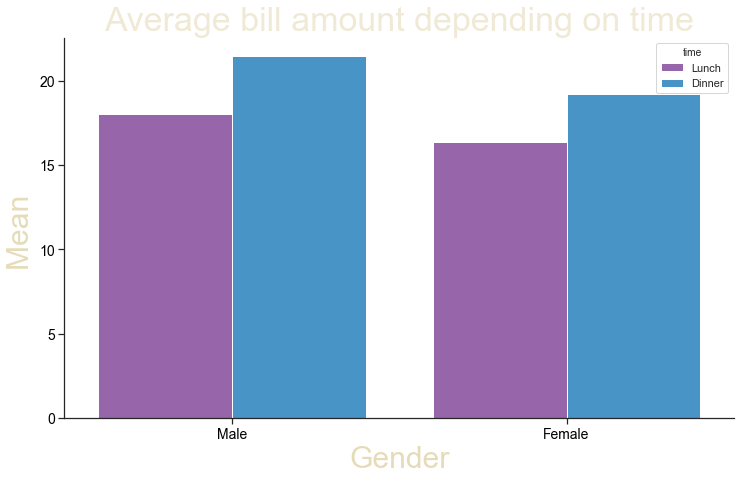

In [88]:
import seaborn as sns
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# This Function takes as input a custom palette
a = sns.barplot(x="sex", y="total_bill", hue="time",
	palette=sns.color_palette(flatui),data=tips,ci=None)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
a.figure.set_size_inches(12,7)
# Set the Title of the graph from here
a.axes.set_title('Average bill amount depending on time',
	fontsize=34,color="y",alpha=0.3)
# Set the xlabel of the graph from here
a.set_xlabel("Gender",size = 30,color="y",alpha=0.5)
# Set the ylabel of the graph from here
a.set_ylabel("Mean ",size = 30,color="y",alpha=0.5)
# Set the ticklabel size and color of the graph from here
a.tick_params(labelsize=14,labelcolor="black")

* During lunch time on average man pay more then woman
* During dinner time on average man also pay more then woman

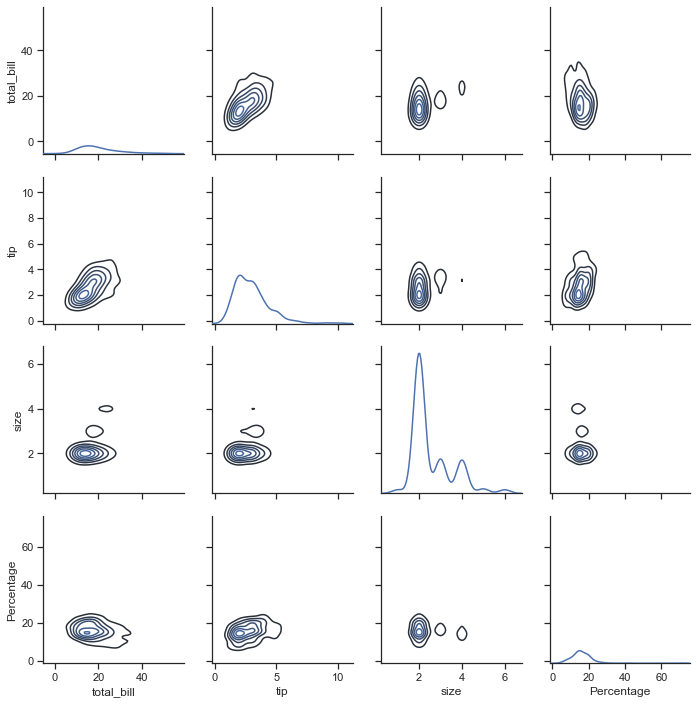

In [91]:
g = sns.PairGrid(tips)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

* Most tables are 2 people tables and they tip highest



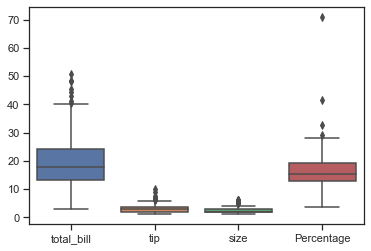

In [92]:
sns.boxplot(data=tips)

* Values visualisation of columns in dataset

-----------------
# Sum Up

It is a pleasure to analyse data using python. Getting to know all the packages it gives analyst wide range of available functions to better present the output.



--------
References
* [Introduction to Python](https://seaborn.pydata.org/introduction.html)
* [Seaborn Visualisation](https://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/)
* [Elite Data Science](https://elitedatascience.com/python-seaborn-tutorial)
* [StackOverflow](https://stackoverflow.com/questions/56866718/sum-of-values-of-a-column-is-different-when-plotted-on-a-seaborn-barplot)
* [Seaborn Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)
* [Pandas](https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9)
* [Data school](https://www.dataschool.io/python-pandas-tips-and-tricks/)
* [Waitress pi](https://pnghunter.com/png/waitress-7/)

